* [The course](https://www.coursera.org/learn/introduction-to-pymc3/home)
* [The course material](https://sjster.github.io/introduction_to_computational_statistics/docs/Production/PyMC3.html)

### Linear Regression

Let us generate some data for linear regression and plot it along with its density.

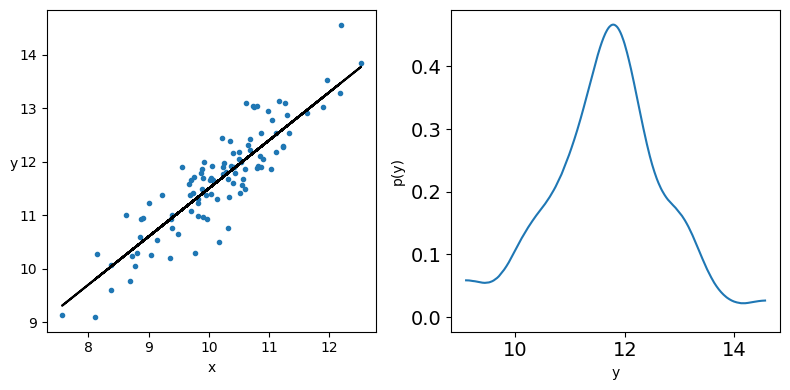

In [5]:
import numpy as np
import arviz as az

np.random.seed(1)
N = 100


# Parameters
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

# Input data drawn from a Normal distribution
x = np.random.normal(10, 1, size=N)

# Output generated from the input and the parameters
y_real = alpha_real + beta_real * x

# Add random noise to y
y = y_real + eps_real

# Plot the data
import matplotlib.pyplot as plt
_, ax  = plt.subplots(1, 2, figsize=(8, 4))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
ax[1].set_ylabel('p(y)')
plt.tight_layout()



### Inference of Parameters in Linear Regression

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.


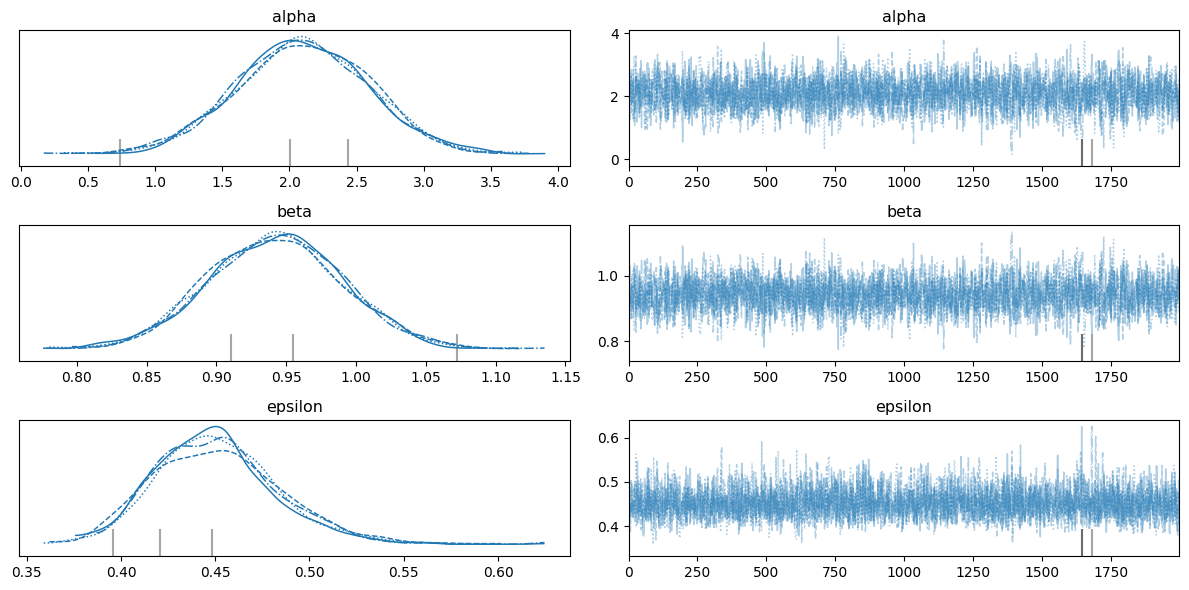

In [6]:
import pymc3 as pm

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=1)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = alpha + beta * x
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    trace_g = pm.sample(2000, tune=1000)

az.plot_trace(trace_g, var_names=['alpha', 'beta', 'epsilon'])  
# increase the size of the figure
plt.tight_layout()
plt.show()

### Parameter Correlations

The joint density between alpha and beta

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/plots/pairplot.py:197: UserWarning:

plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs

Got error No model on context stack. trying to find log_likelihood in translation.


/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/xarray/core/utils.py:494: FutureWarning:

The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.



<Axes: xlabel='alpha', ylabel='beta'>

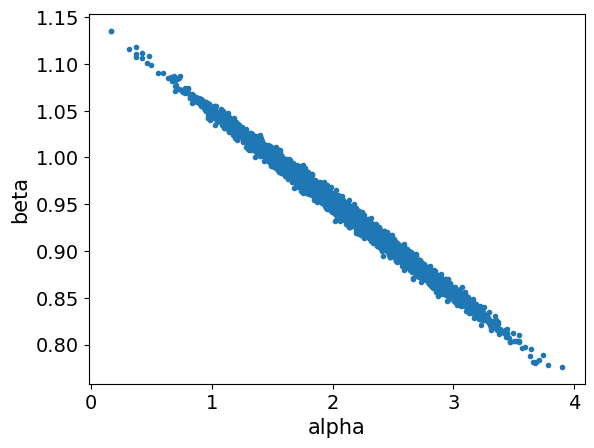

In [7]:
# pairplot
az.plot_pair(trace_g, var_names=['alpha', 'beta'], plot_kwargs={'alpha': 0.1})

### Visualize the Uncertainty

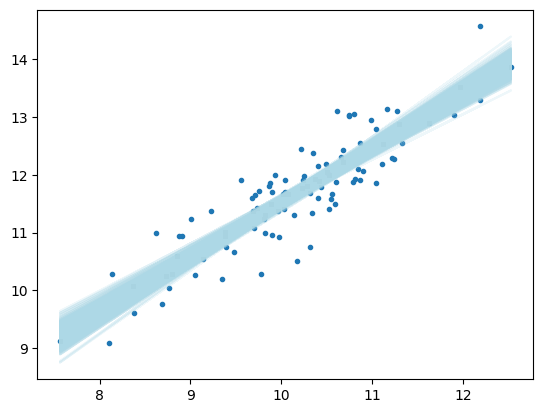

In [8]:
plt.figure()
# plot the true values
plt.plot(x, y, 'C0.')

# Get the mean inferred values
alpha_m = trace_g['alpha'].mean()
beta_m = trace_g['beta'].mean()

# plot all draws to show the variance of the regression lines
draws = range(0, len(trace_g['alpha']), 10)
plt.plot(x, trace_g['alpha'][draws] + trace_g['beta'][draws] * x[:, np.newaxis], c='lightblue', alpha=0.2)

## [Video] - Mean-center the Data

### Mean-Center the Data

Looking at the pairplot of alpha and beta, one can notice the high degree of correlation between the two variables as indicated by the narrow joint density. this result in a paramenter posterior space that is diagonally shaped, which is problematic for many samplers such as the Metropolis-Hasting MCMC sampler. Our recommended approach to minimize theis correlation is to center the independent variables.

 If $x_{avg}$ is the mean of the data x then

$$x_{tilda} = x - x_{avg}$$

The advantage of this is twofold:
1. The pivot point is the intercept when the slope changes.
2. The parameter posterior space is more circular.

### Transformations

In order ot center the data, the original equation for ninear regression given by
$$ y = \alpha + \beta * x $$

has the equivalent to the equation for the centered data

$$y = \alpha_{tilda} + \beta_{tilda}(x - x_{avg}) = \alpha_{tilda} - \beta_{tilda} * x_{avg} + \beta_{tilda} * x $$

### Recovering Data

This implies that we can recover the original intercept $ \alpha $ as 

$$ y = \alpha - \beta * x $$

and $ \beta $ as 

$$ \beta = \beta_{tilda} $$


[Notes from GaG]: This makes intuitive sense. After having subtracted the mean from all samples the space is a different. The intercept should therefore be in a different place than in the original space. The slope however should be the same. The partial derivative does not change if you do a linear transformation like subtracting a constant. 

## Standardize the data

You canals standardize the data by mean centering and dividing by standard deviation:

$$ x_{tilda} = (x - x_{avg} /  \sigma_x)


## Mean centered - Broader Sampling

In [9]:
x

array([ 9.55287144, 11.2245077 , 10.40349164, 10.59357852,  8.90508815,
       10.16938243, 10.74055645,  9.0462994 ,  9.73378149, 10.03261455,
        8.62688268, 10.31515939, 10.84616065,  9.14048406, 10.35054598,
        8.68771659,  9.96130449,  8.38422765, 11.12141771, 10.40890054,
        9.97538304,  9.22483838, 11.27375593, 11.96710175,  8.14201814,
       11.23616403, 11.62765075, 10.3380117 ,  8.80073197, 10.86334532,
        9.8190797 ,  9.39607937,  8.76994186, 10.5505375 , 10.79280687,
        9.37646927, 10.52057634,  8.85565861, 10.80186103, 10.0465673 ,
        9.81343023,  9.89825413, 10.86888616, 10.75041164, 10.52946532,
       10.13770121, 10.07782113, 10.61838026, 10.23249456, 10.68255141,
        9.68988323,  7.56516224, 11.0388246 , 12.18697965, 10.44136444,
        9.89984477,  9.86355526,  9.88094581, 10.01740941,  8.87798127,
        9.48290554,  9.00297317, 10.24879916,  9.70335885, 10.49521132,
        9.82529684, 10.98633519, 10.2135339 , 12.19069973,  8.10

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/plots/pairplot.py:197: UserWarning:

plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs

Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/L

<Axes: xlabel='α', ylabel='β'>

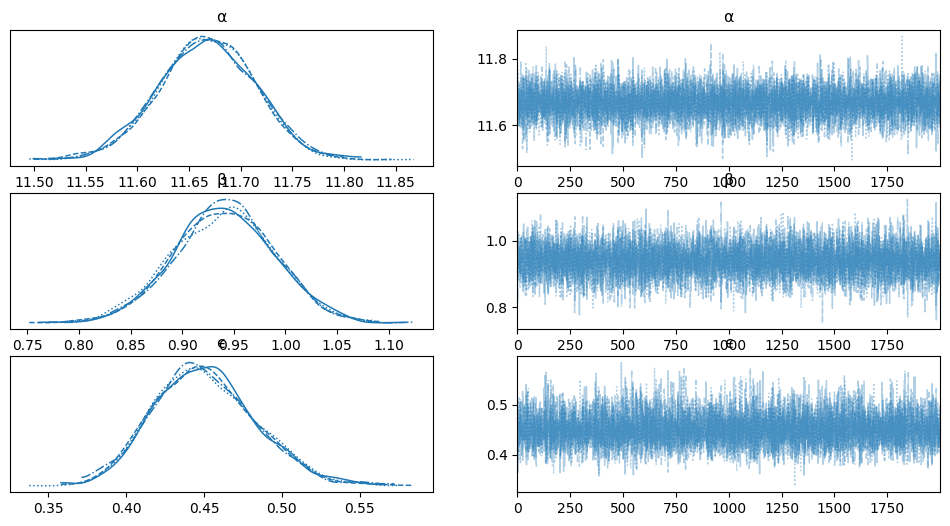

<Figure size 640x480 with 0 Axes>

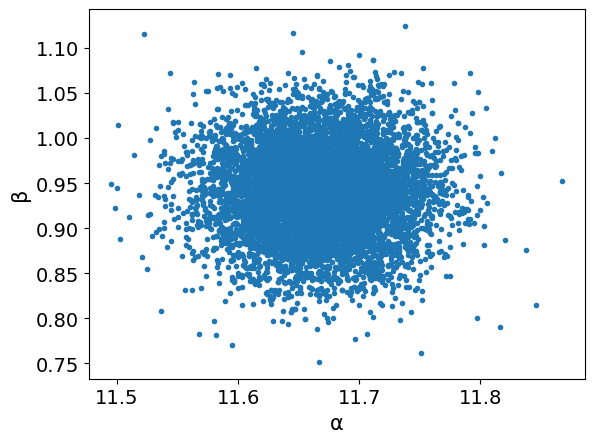

In [10]:
# Center the data
x_centered = x - x.mean()

with pm.Model() as model_g:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = pm.Deterministic('μ', α + β * x_centered)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    α_recovered = pm.Deterministic('α_recovered', α - β * x.mean())
    trace_g = pm.sample(2000, tune=1000)
    
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])
plt.figure()
plt.tight_layout()
az.plot_pair(trace_g, var_names=['α', 'β'], plot_kwargs={'alpha': 0.1})

#### [NOTES GAG]

We should probably do this instead of dividing by the mean in the Regression based model. We have a lot of correlated variables. It would be interesting to see the pair plot for the channels. It would also be interesting to do a bit of a digging in here. How does the pairplot look when doing a column max division vs mean - centering the data. 

## Robust Linear Regression

We fitted our model parameters by assuming the data likelihood was a Normal distribution, however as we saw earlier this assumption suffers from not doing well with outliers. Our solution to this problem is the same, use a Student's t-distribution for the likelihood.

Here we look at the [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), which is a set of 4 data sets. They have similar statistical properties even though they look very different and were used to illustrate the need to visualize the data along with the effect of outliers. Our indended goal is the same, to model data with outliers and assess the sensitivity of the model to these outliers.  

In [11]:
import seaborn as sns
from scipy import stats

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Plot the 4 Subgroups in the Data

Mean of x values in all groups --  9.0 9.0 9.0 9.0
Mean of y values in all groups --  7.500909090909093 7.50090909090909 7.5 7.500909090909091
Variance of x values in all groups --  10.0 10.0 10.0 10.0
Variance of y values in all groups --  3.7520628099173554 3.752390082644628 3.747836363636364 3.7484082644628103


Text(0, 0.5, 'y')

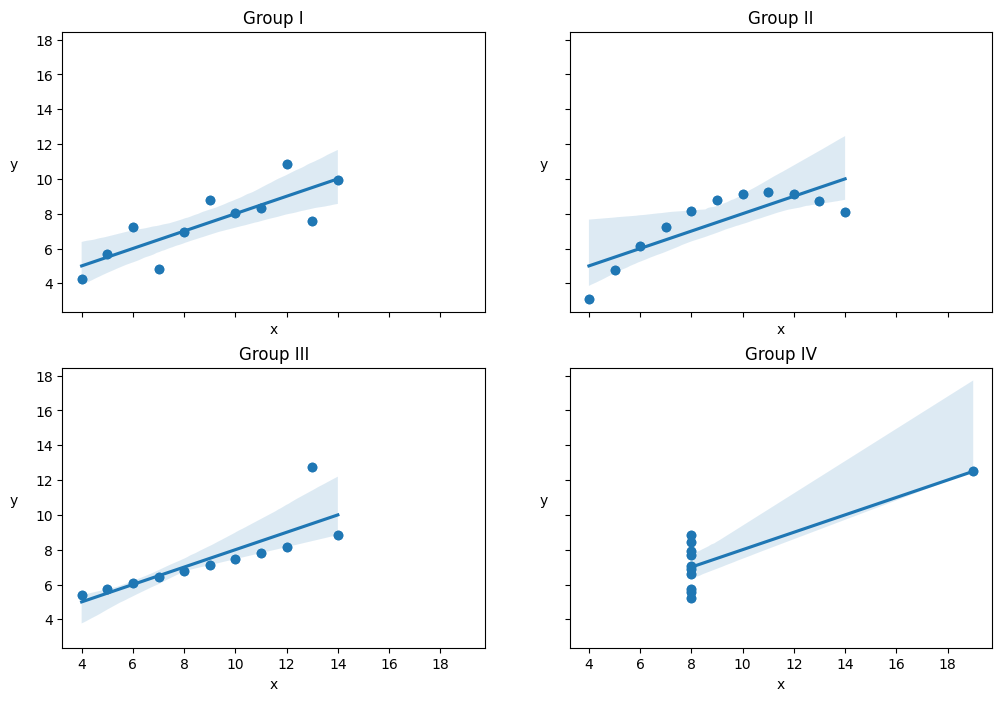

In [12]:
x_0 = df[df.dataset == 'I']['x'].values
y_0 = df[df.dataset == 'I']['y'].values
x_1 = df[df.dataset == 'II']['x'].values
y_1 = df[df.dataset == 'II']['y'].values
x_2 = df[df.dataset == 'III']['x'].values
y_2 = df[df.dataset == 'III']['y'].values
x_3 = df[df.dataset == 'IV']['x'].values
y_3 = df[df.dataset == 'IV']['y'].values
_, ax = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=True)


print("Mean of x values in all groups -- ",x_0.mean(), x_1.mean(), x_2.mean(), x_3.mean())
print("Mean of y values in all groups -- ",y_0.mean(), y_1.mean(), y_2.mean(), y_3.mean())
print("Variance of x values in all groups -- ",x_0.var(), x_1.var(), x_2.var(), x_3.var())
print("Variance of y values in all groups -- ",y_0.var(), y_1.var(), y_2.var(), y_3.var())

ax = np.ravel(ax)

ax[0].scatter(x_0, y_0)
sns.regplot(x=x_0, y=y_0, ax=ax[0])
ax[0].set_title('Group I')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0, labelpad=15)

ax[1].scatter(x_1, y_1)
sns.regplot(x=x_1, y=y_1, ax=ax[1])
ax[1].set_title('Group II')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y', rotation=0, labelpad=15)

ax[2].scatter(x_2, y_2)
sns.regplot(x=x_2, y=y_2, ax=ax[2])
ax[2].set_title('Group III')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y', rotation=0, labelpad=15)

ax[3].scatter(x_3, y_3)
sns.regplot(x=x_3, y=y_3, ax=ax[3])
ax[3].set_title('Group IV')
ax[3].set_xlabel('x')
ax[3].set_ylabel('y', rotation=0, labelpad=15)

### Plot Data Group 3 and its Kernel Density

**[GAG notes]**
* Left plot: Just plotting the best fitting line throught the data.
* right plot: Is just a density graph for the y-th values (the output dimention).

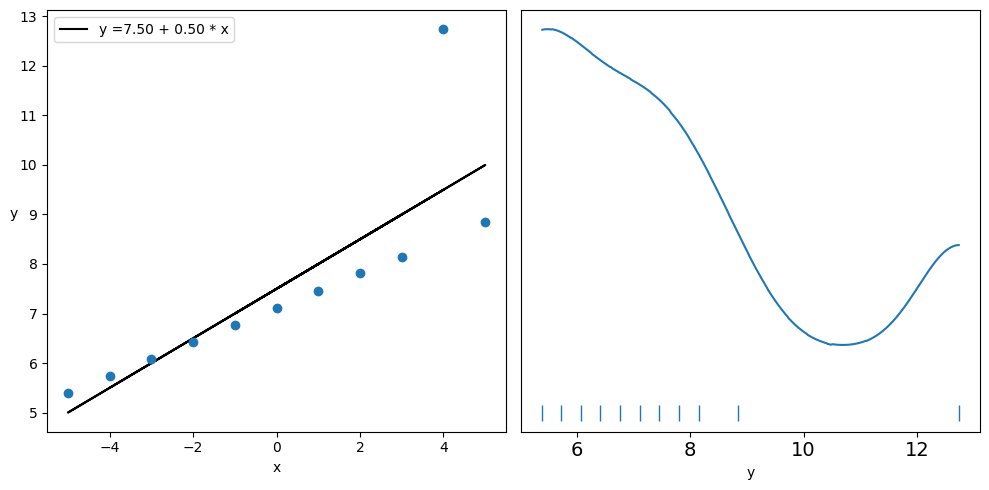

In [13]:
x_2 = x_2 - x_2.mean()

_, ax = plt.subplots(1, 2, figsize=(10, 5))

beta_c, alpha_c = stats.linregress(x_2, y_2)[:2]
ax[0].plot(
    x_2, 
    (alpha_c + beta_c * x_2),
    'k',
    label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x'
)
ax[0].plot(x_2, y_2, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)

az.plot_kde(y_2, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()

### Model using a Student's t distribution


[GaG addition]

Before doing that let's get a bit more custome to the students't distribution.

**STUDENT'S T-DISTRIBUTION**

The student's t distribution is a probability distribution that arises when estimating the mean of a normally distributed population in situtions where the sample size is small and the population standard deviation is unknown.

Key Characteristics of the Student's t-distribution:

1. **shape**: the t-distribution is symmetric and bell-shaped, like the normal distribution, but it has heavier tails. This means it is more prone to producing values that fall far form its mean.
2. **Degrees of Freedom (df)**: The shape of the t-distribution depends on the degrees of freedom. The degrees of freedom typically equal th sample size minus one (n-1). As the degrees of freedom increases, the t-distribution approaches the normal distribution.
3. **Standard deviation**: The t-distribution's standard deviation (or spread) is slightly larger than that of the normal distribuiton, reflecting the increased uncertainty that comes with smaller sample size.

In [14]:
import numpy as np
import plotly.graph_objects as go
from scipy.stats import t

# Degrees of freedom
dfs = [0.2, 0.5, 1, 5, 10, 30]

# X values from -5 to 5
x = np.linspace(-5, 5, 100)

# Create a plotly figure
fig = go.Figure()

# Adding traces for each degree of freedom
for df in dfs:
    y = t.pdf(x, df)
    fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name=f'DF = {df}'))

# Update layout
fig.update_layout(
    title='Student\'s t-Distribution with Different Degrees of Freedom',
    xaxis_title='Values',
    yaxis_title='Probability Density',
    legend_title='Degrees of Freedom',
    template="plotly_white"  # Optional: Use "plotly", "plotly_white", etc. for different themes
)

# Show plot
fig.show()

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_, ϵ, β, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.716700537712483, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


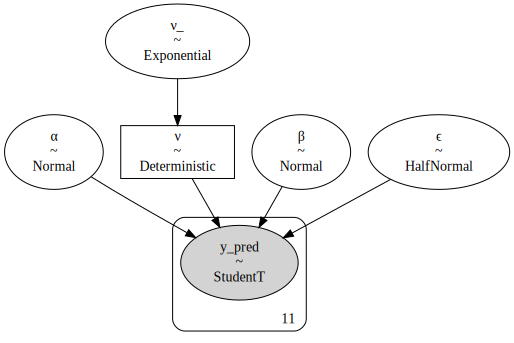

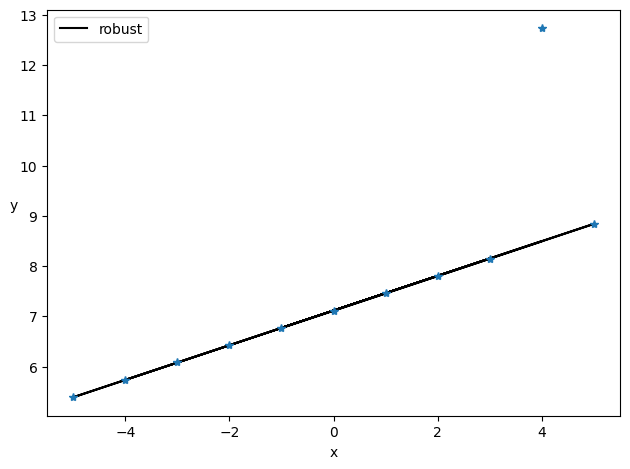

In [15]:
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1) # shifting the exponential to avoid values close to 0
    y_pred = pm.StudentT('y_pred', mu=α + β * x_2,
                         sd=ϵ, nu=ν, observed=y_2)
    trace_t = pm.sample(2000)
    
alpha_m = trace_t['α'].mean()
beta_m = trace_t['β'].mean()
plt.plot(x_2, alpha_m + beta_m * x_2, c='k', label='robust')
plt.plot(x_2, y_2, '*')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

pm.model_to_graphviz(model_t)

**[GaG notes]**

I think this is really interesting to see. My intution is the following. Bayesian statistics tries to maximize the probability of seeing the data given some priors and a likelihood function. If the likelihood function penalizes outliers heavily then it will try its best to model the outlier, because getting the line closer to the outlier maximizes the likelihood of seeing the data. If it is however more likely to see an outlier then the maximization algorithm does not need to focus to much on the outlier.

So given a student Ts likelihood function the linear regression is not as much effected by the outlier in the dataset. This happens because outliers are more likely to happen in the student's T distribution than in a normal distribution.

Its maybe more intuitive to think about it from the generative site of things. We are trying to create a statistical model that could have generated the data. If we use a normal distribution as our likelihood funciton then there is no way we could generate the outlier without moving the line much closer to that point. If we however use the student's t distribution then it is possible to generate the outlier (and it is not that unlikely with low degrees of freedom). That's why it is ok to have the line perfectly fitted through the other points. The generative model can still create the outlier.


## Hierarchical Models

we want to use the same hierarchical or multilevel modeling technique that was discussed earlier, for linear regression problems as well. As mentioned above, this is particularly useful when presented with imbalanced subgroups of sparse data. In this example, we create data with 8 subgroups. In this data, 7 of the subgroups have 20 data points and the last one ha a single data point.

The data for all of the 8 groups are generated from a normal distribution of mean 10 and standard deviation of 1. The parameters for the linear model are generated from the normal and beta distribution.

### Data Generation

Alpha parameters  [4.16608544 4.78196448 4.85228509 3.29292904 3.06834281 4.88666088
 3.77821034 4.38172358]


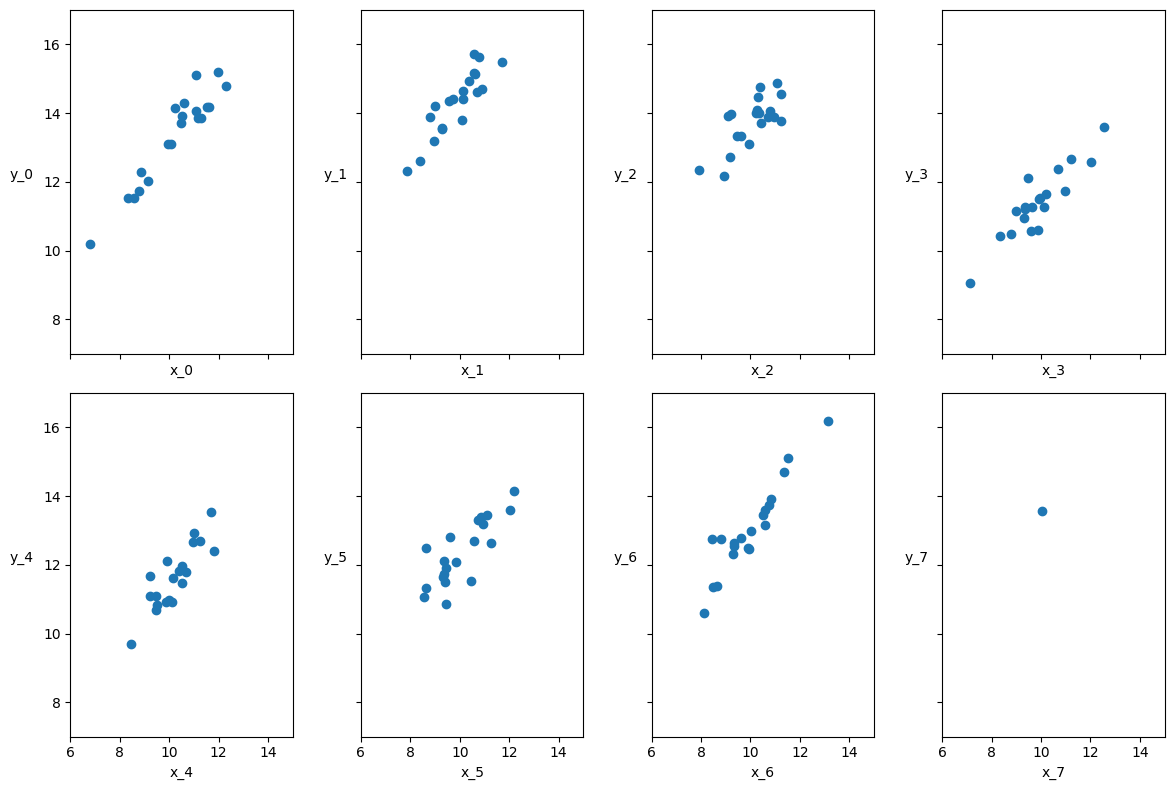

In [16]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)

np.random.seed(314)
alpha_real = np.random.normal(4, 1, size=M) 
beta_real = np.random.beta(7, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))
print("Alpha parameters ", alpha_real )

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
_, ax = plt.subplots(2, 4, figsize=(12,8), sharex=True, sharey=True)

ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)     
    j += N
    k += N

plt.tight_layout()

## Non-hierarchical Model

We build a non-hierarchical model first for comparison. We also mean-center the data for ease of convergence. Note how the obtained α and β values vary for each group, particularly the scale of the lst one, which is really off.

In [21]:
M

8

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, ϵ, β, α_tmp]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No 

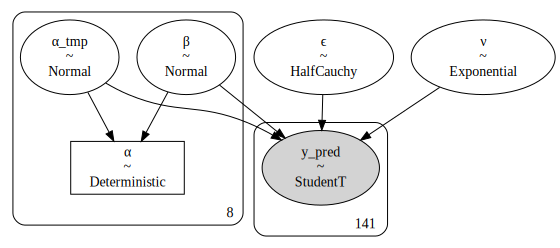

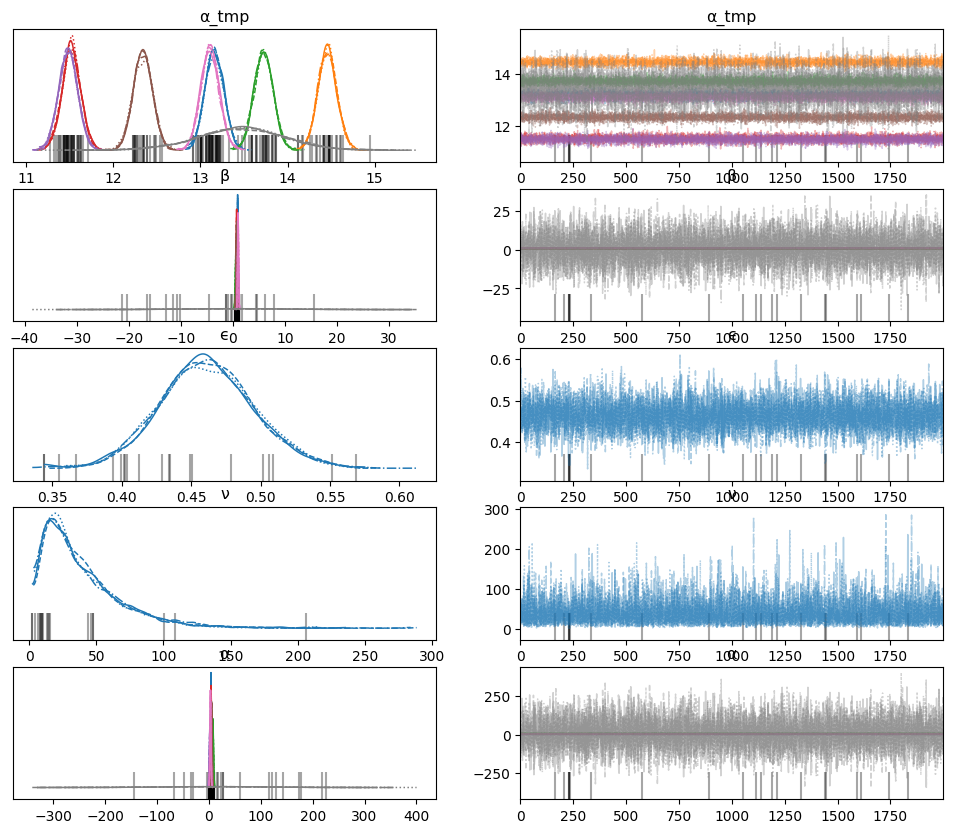

<Figure size 640x480 with 0 Axes>

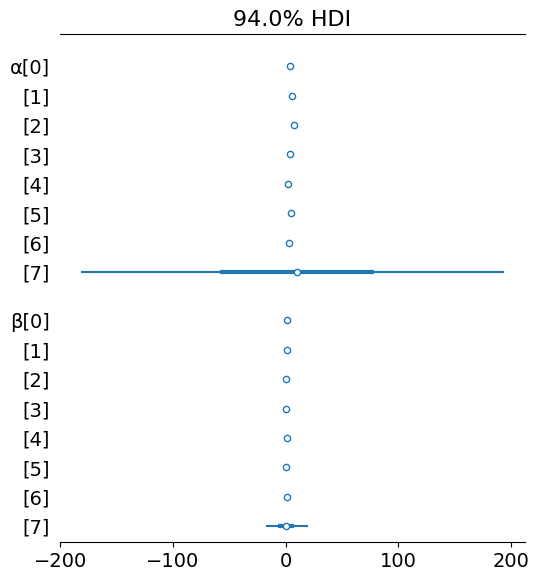

In [17]:
# Center the data
x_centered = x_m - x_m.mean()

with pm.Model() as unpooled_model:
    # Note the M prior parameters for the M groups
    α_tmp = pm.Normal('α_tmp', mu=2, sd=5, shape=M)
    β = pm.Normal('β', mu=0, sd=10, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    
    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered, sd=ϵ, nu=ν, observed=y_m)
    # Rescale alpha back - after x had been centered the computed alpha is different from the original alpha
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    trace_up = pm.sample(2000)

az.plot_trace(trace_up)
plt.figure()
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True)
az.summary(trace_up)

pm.model_to_graphviz(unpooled_model)

What is interesting in the forrest plot above is that the alpha and beta spread of values for the small dataset is much wider than for the other groups.

## Hiearchical Model

We set hyperpriors on the α and β parameters. To be more precise, the hyperpriors are applied to the scaled version of α , i.e. $α_{tmp}$ 

In [25]:
trace_hm['α'].shape

(4000, 8)

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν, ϵ, β, α_tmp, β_σ, β_μ, α_σ_tmp, α_μ_tmp]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 54 divergences after tuning. Increase `target_accept` or reparameterize.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



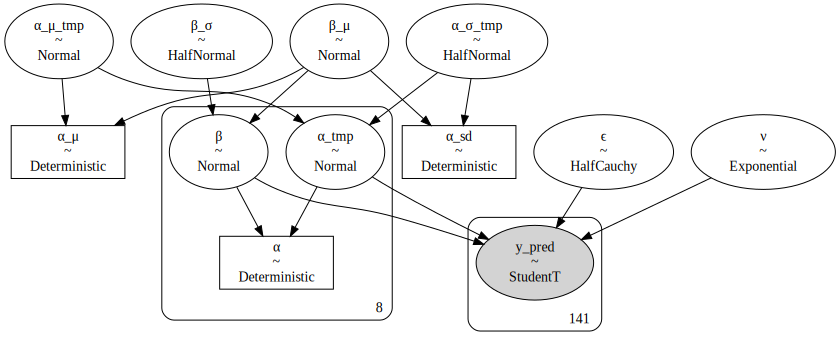

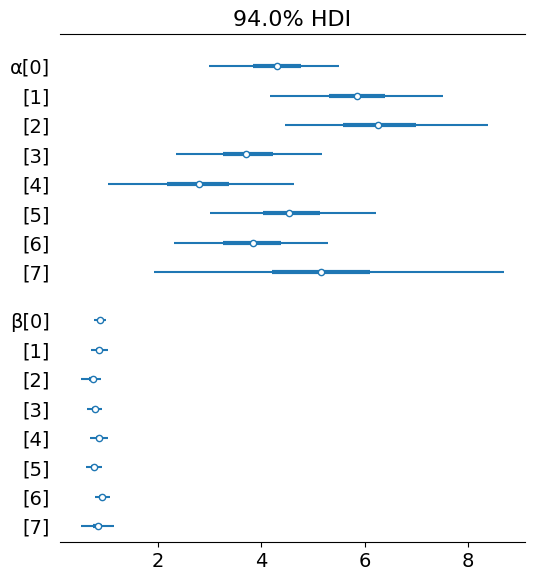

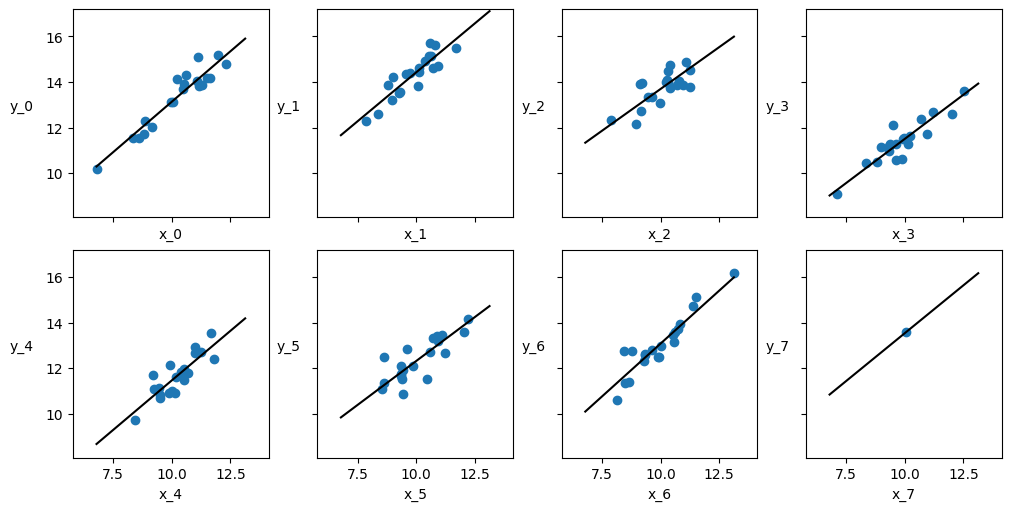

In [22]:
with pm.Model() as hierarchical_model:
    # Hyperpriors - we add these instead of setting the prior values to a constant
    # Note that there exists only one hyperprior  for all M groups, shared hyperprior
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=100, sd=1) # try changing these hyperparameters
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10) # try changing these hyperparameters
    β_μ = pm.Normal('β_μ', mu=10, sd=2) # reasonable changes do not have an impact
    β_σ = pm.HalfNormal('β_σ', sd=5)
    
    # priors - note that the prior parameters are no longer a constant
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    y_pred = pm.StudentT('y_pred',
                         mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ *
                           x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())
    trace_hm = pm.sample(1000)



az.plot_forest(trace_hm, var_names=['α', 'β'], combined=True)

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)

    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

pm.model_to_graphviz(hierarchical_model)


If you look at the forest plot for these parameters, you'll see that now, alpha 7 and beta 7 have reasonable values as opposed to earlier when alpha 7 and beta 7 had a fairly large distribution. o

The most interesting thing to notice can be seen by looking at the scatter plot. What is interesting is that the last subgroup only has one data point but the model is still able to fit a regression line through it. This is because it's able to use information from the other groups and that allows us to fit a regression line through this single data point. This would not have been possible in a non-hierarchical  model.

# Polynomial Regression for Nonlinear Data

What happens when the data is inherently nonlinear? It is appropriate to use non-linear combinations of the inputs. This could be in the form of higher order tems such as $x^2$, $x^3$, or it could be use basis functions such as the cosine function, $cos(x)$.


## Data Generation
Use the values from the dataset in Anscombe's quartet we used earlier as our non-linear data. We will use the regression model given by

$$y = \alpha + \beta_1 * x_{centered} + \beta_2 * x_{centered}^2 $$

Text(0, 0.5, 'y')

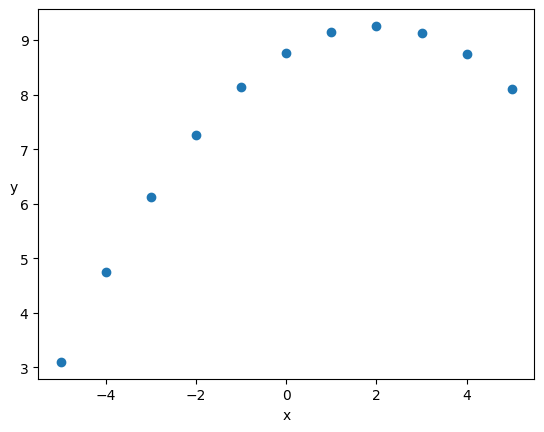

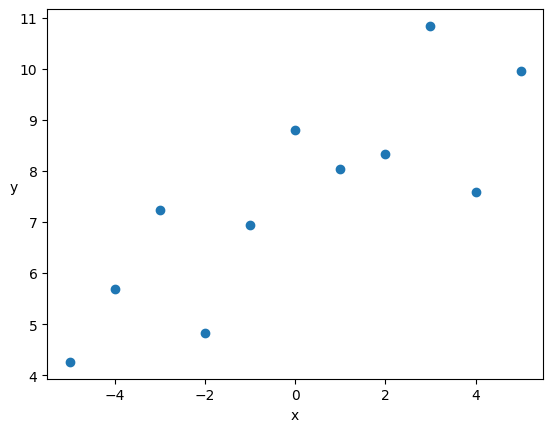

In [26]:
x_1_centered = x_1 - x_1.mean()
plt.scatter(x_1_centered, y_1)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.figure()
x_0_centered = x_0 - x_0.mean()
plt.scatter(x_0_centered, y_0)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Inference on Data 1

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.8835065654712093, but should be close to 0.8. Try to increase the number of tuning steps.


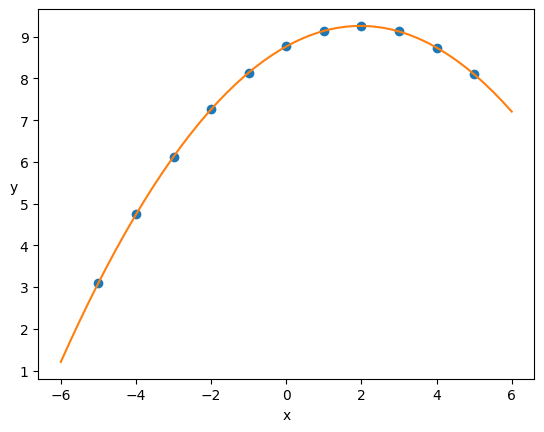

In [27]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_1.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_1_centered + β2 * x_1_centered**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_1)
    trace = pm.sample(2000, tune=2000)
    
x_p = np.linspace(-6, 6)
y_p = trace['α'].mean() + trace['β1'].mean() * x_p + trace['β2'].mean() * x_p**2
plt.scatter(x_1_centered, y_1)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')


## Inference on Data 2

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β2, β1, α]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


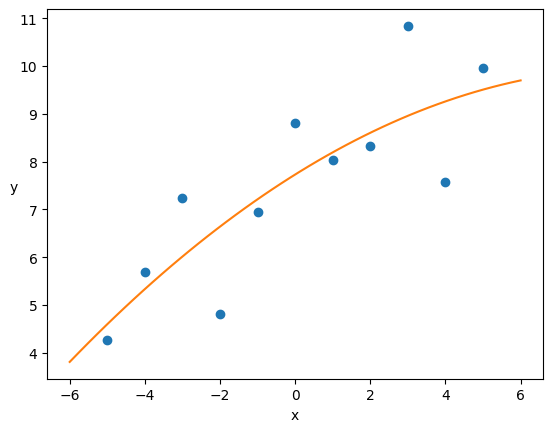

In [28]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_0.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_0_centered + β2 * x_0_centered**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_0)
    trace = pm.sample(2000)
    
x_p = np.linspace(-6, 6)
y_p = trace['α'].mean() + trace['β1'].mean() * x_p + trace['β2'].mean() * x_p**2
plt.scatter(x_0_centered, y_0)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')

# Multiple Linear Regression

In Multiple Linear Regression, there is more than one independent variable to predict the outcome of one dependent variable.

$$ y = \alpha + \vec{\beta} * \vec{X} $$

## Data Generation

The example below generates two-dimensional data for X. It plots the variation of 'y' with each component of X in the top two figures. The bottom figure indicates the correlation of the two components of X.

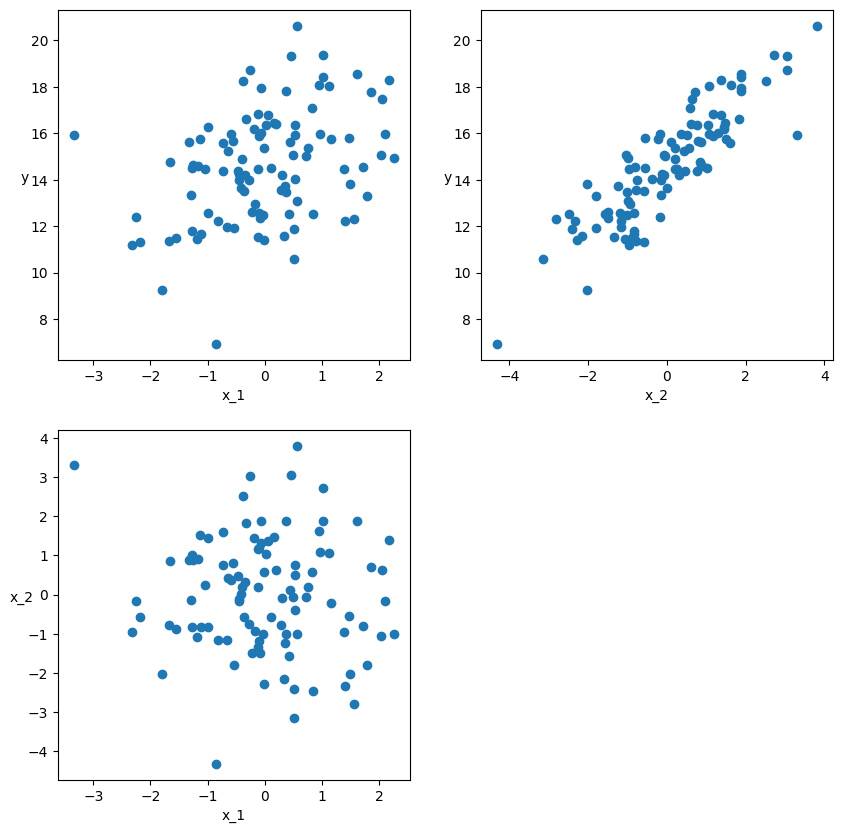

In [29]:
np.random.seed(314)

# N is the total number of observations 
N = 100
# m is 2, the number of independent variables
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)

# X is # n x m
X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T 
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'x_{idx+1}')
        plt.ylabel(f'y', rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

scatter_plot(X_centered, y)

## Inference

This code is very similar to what we ahve already seen, the only real difference being the dimensionality of the coefficients and the inputs. Something you would notice is that as the number of unknowns increase, the uncertainty associated with our inferences become larger. It is beneficial to have more accurate priors in this situations.

In [33]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=2, sd=2) # Try changing the prior distribution
    β = pm.Normal('β', mu=0, sd=5, shape=2) # Note the shape of beta
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α_tmp + pm.math.dot(X_centered, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace = pm.sample(2000, tune=1000)
    
az.summary(trace)

/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α_tmp]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/gretar/Git/LEARNING/Bayesian_Statistics/coursera__introduction_to_pymc/env/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp,14.590,0.047,14.498,14.676,0.000,0.000,11935.0,5962.0,1.0
β[0],0.971,0.044,0.891,1.054,0.000,0.000,11683.0,5955.0,1.0
β[1],1.472,0.032,1.411,1.532,0.000,0.000,12617.0,5890.0,1.0
ϵ,0.474,0.035,0.412,0.541,0.000,0.000,11994.0,6329.0,1.0
α[0],1.818,0.458,0.953,2.659,0.004,0.003,11462.0,5919.0,1.0


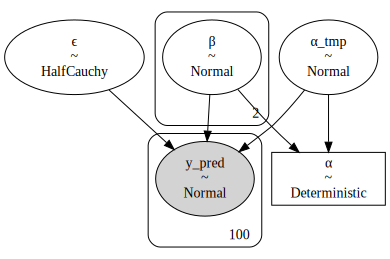

In [34]:
pm.model_to_graphviz(model_mlr)